<a href="https://colab.research.google.com/github/Migue-mr/Data-Analytics-Stock-and-Revenue/blob/main/Dataset%20Spaceship.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from google.colab import drive
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

In [85]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [86]:
df_space=pd.read_csv('/content/drive/MyDrive/spaceship/train.csv')
df_space_test =pd.read_csv('/content/drive/MyDrive/spaceship/test.csv')

In [87]:
df_space.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [88]:
df_space.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [89]:
df_space.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


# 1º Duplicados

In [90]:
def duplicated(df):

  if df.duplicated().sum() > 0:
      df.drop_duplicates(inplace=True)
  return df

In [91]:
df_space = duplicated(df_space)

# Gráficos antes de limpiar los nulos.

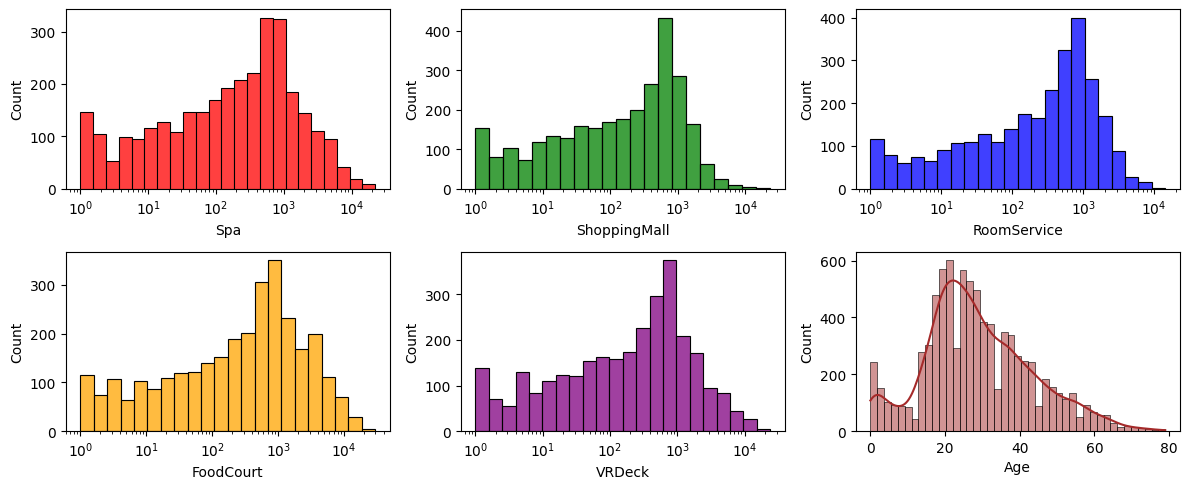

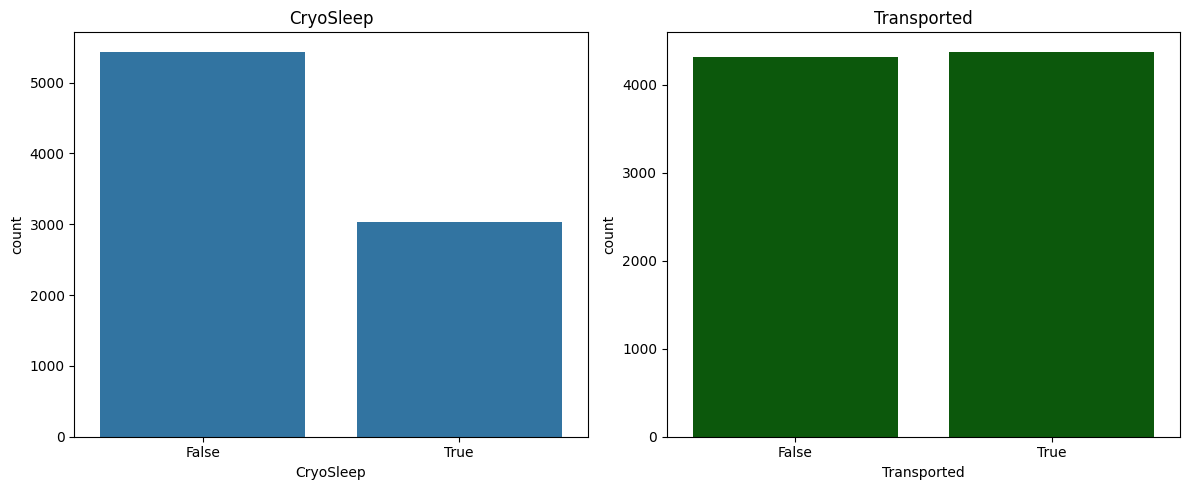

In [92]:
fig, ax=plt.subplots(2,3,figsize=(12,5))

sns.histplot(df_space['Spa'],ax=ax[0,0],log_scale=True,color='red') # Empleo escala logaritmica para que los valores pequeños se expandan
sns.histplot(df_space['ShoppingMall'],ax=ax[0,1],log_scale=True,color='green')
sns.histplot(df_space['RoomService'],ax=ax[0,2],log_scale=True,color='blue')
sns.histplot(df_space['FoodCourt'],ax=ax[1,0],log_scale=True,color='orange')
sns.histplot(df_space['VRDeck'],ax=ax[1,1],log_scale=True,color='purple')
sns.histplot(df_space['Age'],ax=ax[1,2],kde=True,color='brown')
plt.tight_layout()
plt.show()
print('')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df_space['CryoSleep'], ax=ax[0])
ax[0].set_title("CryoSleep")

sns.countplot(x=df_space['Transported'], ax=ax[1],color='darkgreen')
ax[1].set_title("Transported")

plt.tight_layout()
plt.show()


#2º Nulos Numéricos

In [93]:
def is_null(df_train,df_test,*cols):
  for  colum in cols:
    if df_train[colum].isnull().sum()>0:

      if (df_train[colum].isnull().sum())/(len(df_train)) > 0.7:
        df_train.drop(columns=colum,inplace=True)
      else:
        df_train[colum].fillna(df_train[colum].mean(),inplace=True)
        df_test[colum].fillna(df_train[colum].mean(),inplace=True)

  return df_train,df_test

In [94]:
df_space,df_space_test = is_null(df_space,df_space_test,'Age')

/tmp/ipython-input-4092770419.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[colum].fillna(df_train[colum].mean(),inplace=True)
/tmp/ipython-input-4092770419.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

#3º Nulos no Numéricos


In [95]:
def is_null_object(df_train,df_test,*cols):
  for  colum in cols:
    if df_train[colum].isnull().sum()>0:

      if (df_train[colum].isnull().sum())/(len(df_train)) > 0.7:
        df_train.drop(columns=colum,inplace=True)
      else:
        df_train[colum].fillna(df_train[colum].mode()[0],inplace=True)
        df_test[colum].fillna(df_train[colum].mode()[0],inplace=True)

  return df_train,df_test

In [96]:
df_space,df_space_test=is_null_object(df_space,df_space_test,'HomePlanet','Destination','VIP','CryoSleep')

/tmp/ipython-input-1006639760.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train[colum].fillna(df_train[colum].mode()[0],inplace=True)
/tmp/ipython-input-1006639760.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

# Gráficos después de limpiar nulos

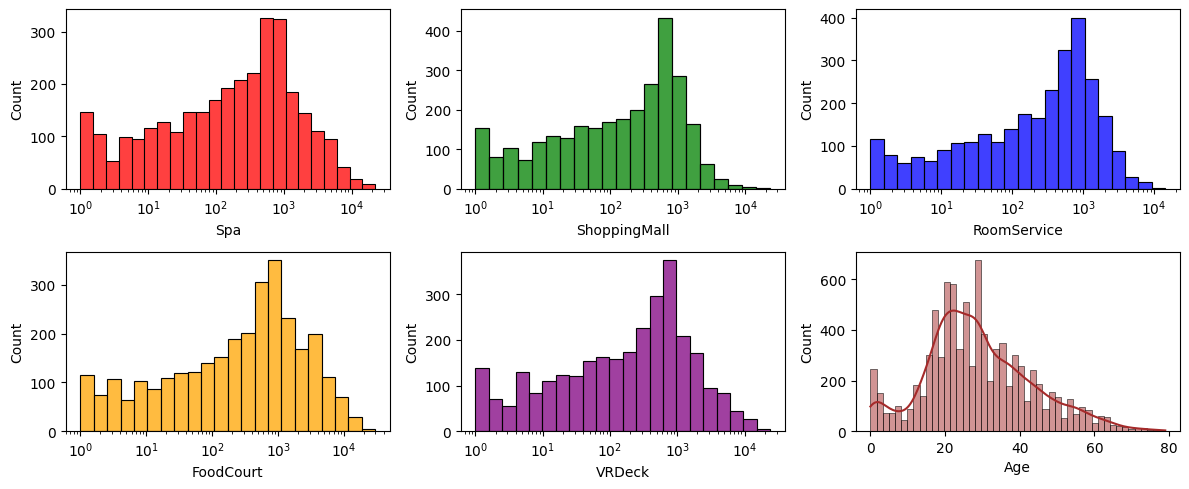

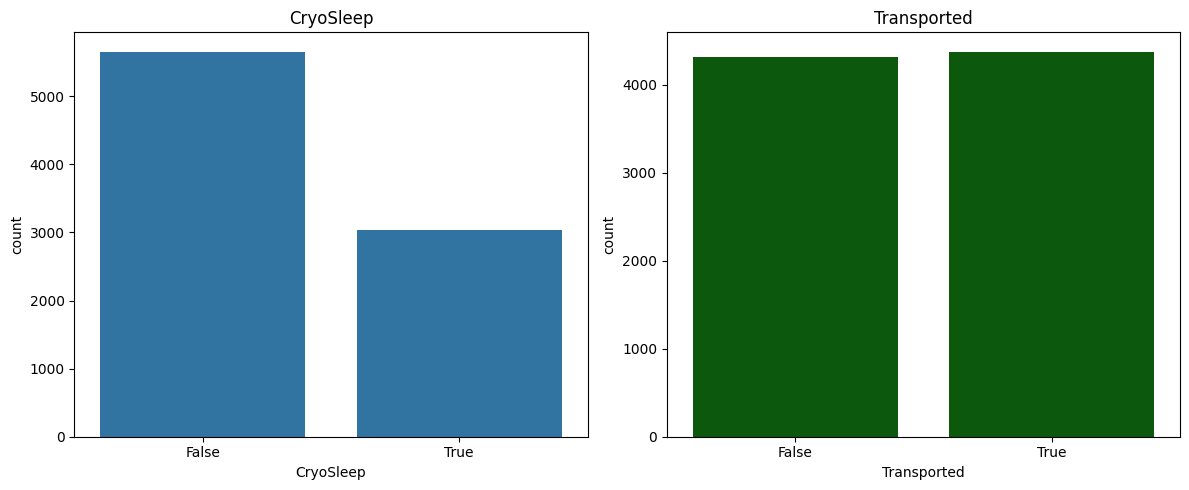

In [97]:
fig, ax=plt.subplots(2,3,figsize=(12,5))

sns.histplot(df_space['Spa'],ax=ax[0,0],log_scale=True,color='red') # Empleo escala logaritmica para que los valores pequeños se expandan
sns.histplot(df_space['ShoppingMall'],ax=ax[0,1],log_scale=True,color='green')
sns.histplot(df_space['RoomService'],ax=ax[0,2],log_scale=True,color='blue')
sns.histplot(df_space['FoodCourt'],ax=ax[1,0],log_scale=True,color='orange')
sns.histplot(df_space['VRDeck'],ax=ax[1,1],log_scale=True,color='purple')
sns.histplot(df_space['Age'],ax=ax[1,2],kde=True,color='brown')
plt.tight_layout()
plt.show()
print('')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

sns.countplot(x=df_space['CryoSleep'], ax=ax[0])
ax[0].set_title("CryoSleep")

sns.countplot(x=df_space['Transported'], ax=ax[1],color='darkgreen')
ax[1].set_title("Transported")

plt.tight_layout()
plt.show()


#4º Outliners

In [98]:
#def outliners(df_train,df_test,*col,k):
  #for colum in col:
    #q1 = df_train[colum].quantile(0.25)
    #q3 = df_train[colum].quantile(0.75)
    #iqr = q3 - q1
    #min_val = q1 - k * iqr
    #max_val = q3 + k * iqr
    #tukey = df_train[(df_train[colum] >=min_val) & (df_train[colum] <= max_val)]

    # Limitar los valores atípicos del df_test a los límites calculados del df_train
    #df_test[colum] = np.where(df_test[colum] > max_val, max_val, df_test[colum])
    #df_test[colum] = np.where(df_test[colum] < min_val, min_val, df_test[colum])
  #df_train=tukey
  #df_test=df_test

  #return df_train,df_test
#df_space,df_space_test=outliners(df_space,df_space_test,'Age','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck',k=10)

#5º Features Engineer

In [99]:
#Creo grupo de edad y normalizo la edad por sus grupos.
def age_group(age):
  if age <= 12:
    return 'Child'
  elif age <= 20:
    return 'Teen'
  elif age <= 35:
    return 'Adult'
  else:
    return 'Senior'
df_space_test['Age Group']=df_space_test['Age'].apply(age_group)
df_space['Age Group']=df_space['Age'].apply(age_group)

## df_space

In [100]:
# Divido PassengerId, en grupo y el id
df_space['ID']=df_space['PassengerId'].str.split('_').str[0]
group=df_space['ID'].value_counts()
df_space['Group']=df_space['ID'].map(group)
df_space['ID']=df_space['ID'].astype(int)

# Determino si viaja solo o con familia
df_space['With Family']=(df_space['Group']>1)
df_space['With Family']=df_space['With Family'].map({True:1,False:0})

# Separo la columna de cabina en Clase, Nº de Hab. y el lado de la nave
df_space['Cabin']=df_space['Cabin'].fillna('X/-1/X')
df_space[['Deck','Num','Side']]=df_space['Cabin'].str.split('/',expand=True)
df_space['Num']=pd.to_numeric(df_space['Num']).astype(int)

# Hago la sumatoria de los gastos, y creo un booleano para identificar quien gasta y quien no. Y establezco el porcentaje de gasto sobre el total.
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df_space[spend_cols]=df_space[spend_cols].fillna(0)
df_space['Total']=df_space[spend_cols].sum(axis=1)
df_space['Is_Zero']=(df_space['Total']==0).astype(int)
for i in spend_cols:
  df_space[f'{i} Percentage']=df_space[i]/df_space['Total']
  df_space[f'{i} Percentage'].fillna(0,inplace=True)

# Número total de pasajeros en cada lado.
num_side=df_space.groupby('Side')['Side'].value_counts()
df_space['Num_Side']=df_space['Side'].map(num_side)

#Número total de pasajeros por clase.
num_desk=df_space.groupby('Deck')['Side'].count()
df_space['Deck Num']=df_space['Deck'].map(num_desk).astype(int)

#Establezco un booleano, para determinar si es niño o no.
df_space['Is child']=(df_space['Age Group']=='Child')
df_space['Is child']=df_space['Is child'].map({True:1,False:0})

#Modifico las columnas a valores 0,1.
df_space['CryoSleep']=df_space['CryoSleep'].map({True:1,False:0})
df_space['VIP']=df_space['VIP'].map({True:1,False:0})
df_space['Transported']=df_space['Transported'].map({True:1,False:0})

df_space.drop(columns=['Cabin','Name','PassengerId',"RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"],inplace=True)

/tmp/ipython-input-1597403885.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_space[f'{i} Percentage'].fillna(0,inplace=True)
/tmp/ipython-input-1597403885.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', tr

# df_space_test

In [101]:
# Divido PassengerId, en grupo y el id
df_space_test['ID']=df_space_test['PassengerId'].str.split('_').str[0]
group=df_space_test['ID'].value_counts()
df_space_test['Group']=df_space_test['ID'].map(group)
df_space_test['ID']=df_space_test['ID'].astype(int)

# Separo la columna de cabina en Clase, Nº de Hab. y el lado de la nave
df_space_test['Cabin']=df_space_test['Cabin'].fillna('X/-1/X')
df_space_test[['Deck','Num','Side']]=df_space_test['Cabin'].str.split('/',expand=True)
df_space_test['Num']=pd.to_numeric(df_space_test['Num']).astype(int)

# Hago la sumatoria de los gastos, y creo un booleano para identificar quien gasta y quien no. Y establezco el porcentaje de gasto sobre el total.
spend_cols = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df_space_test[spend_cols]=df_space_test[spend_cols].fillna(0)
df_space_test['Total']=df_space_test[spend_cols].sum(axis=1)
df_space_test['Is_Zero']=(df_space_test['Total']==0).astype(int)
for i in spend_cols:
  df_space_test[f'{i} Percentage']=df_space_test[i]/df_space_test['Total']
  df_space_test[f'{i} Percentage'].fillna(0,inplace=True)

# Número total de pasajeros en cada lado.
num_side=df_space_test.groupby('Side')['Side'].value_counts()
df_space_test['Num_Side']=df_space_test['Side'].map(num_side)

#Número total de pasajeros por clase.
num_desk=df_space_test.groupby('Deck')['Side'].count()
df_space_test['Deck Num']=df_space_test['Deck'].map(num_desk).astype(int)

# Determino si viaja solo o con familia
df_space_test['With Family']=(df_space_test['Group']>1)
df_space_test['With Family']=df_space_test['With Family'].map({True:1,False:0})

#Establezco un booleano, para determinar si es niño o no.
df_space_test['Is child']=(df_space_test['Age Group']=='Child')
df_space_test['Is child']=df_space_test['Is child'].map({True:1,False:0})

#Modifico las columnas a valores 0,1.
df_space_test['CryoSleep']=df_space_test['CryoSleep'].map({True:1,False:0})
df_space_test['VIP']=df_space_test['VIP'].map({True:1,False:0})

df_space_test.drop(columns=['Cabin','Name',"RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"],inplace=True)

/tmp/ipython-input-692997820.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_space_test[f'{i} Percentage'].fillna(0,inplace=True)
/tmp/ipython-input-692997820.py:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

#6º Dummies

In [102]:
def dummies(df_train,df_test,*cols):
  for colum in cols:
    df_train=pd.get_dummies(df_train,columns=[colum],drop_first=True,dtype='int')
    df_test=pd.get_dummies(df_test,columns=[colum],drop_first=True,dtype='int')
  return df_train,df_test
df_space,df_space_test=dummies(df_space,df_space_test,'HomePlanet','Destination','Deck','Side','Age Group')

#7º Correlacion

Columnas que se eliminarán: {'Deck_X', 'Num_Side', 'Is child', 'Age Group_Child', 'Side_X'}


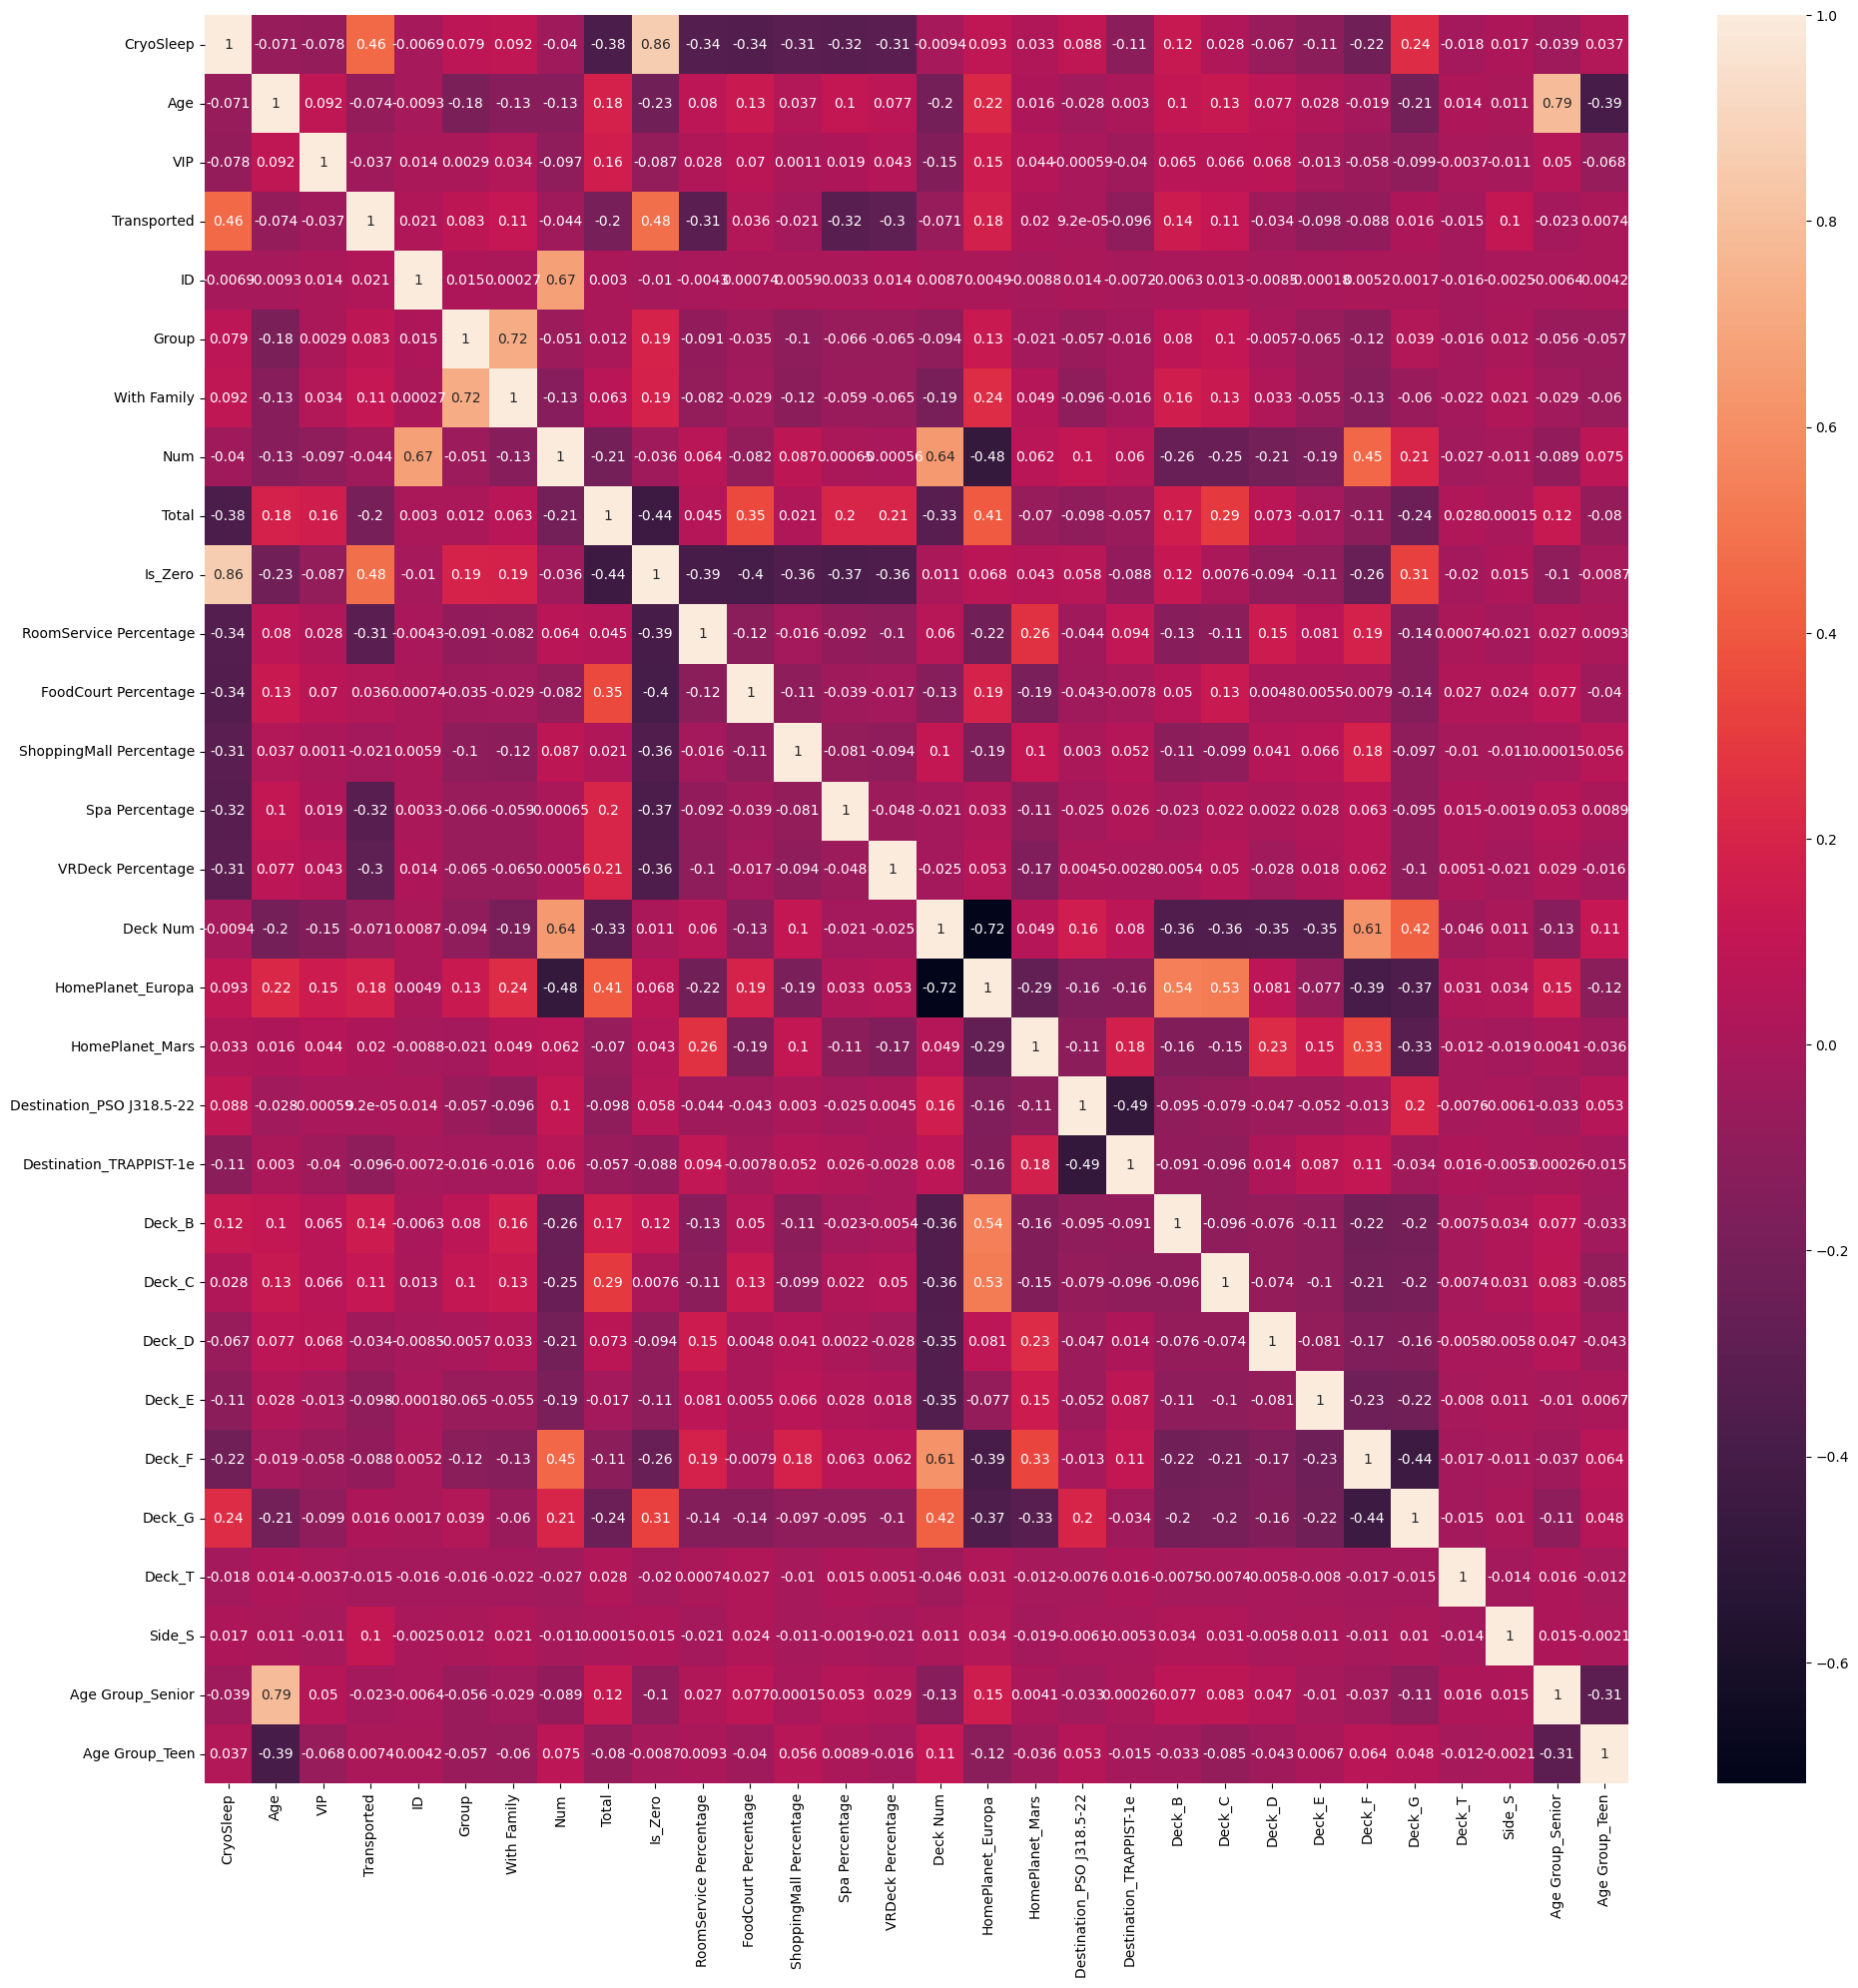

In [103]:
def corr(df_train,df_test):
  col_drop=set()
  correlacion = df_train.corr()
  for i in correlacion.index:
    for j in correlacion.columns:
      if abs(correlacion.loc[i,j])>0.9 and i!=j:
        col_drop.add(j)
  print("Columnas que se eliminarán:", col_drop)
  df_train.drop(columns=col_drop,inplace=True)
  df_test.drop(columns=col_drop,inplace=True,errors='ignore')

  plt.figure(figsize=(23,23))
  sns.heatmap(df_train.corr(),annot=True)
  plt.show()
  return df_train,df_test
df_space,df_space_test=corr(df_space,df_space_test)

#8º Escalado

In [104]:
def escalar(df_train,df_test,*cols):
  for colum in cols:
    if colum in df_train.columns and colum in df_test.columns:
      min=df_train[colum].min()
      max=df_train[colum].max()
      if max==min:
        df_train[colum]=0.0
        df_test[colum]=0.0
      else:
        df_train[colum]=(df_train[colum]-min)/(max-min)
        df_test[colum]=(df_test[colum]-min)/(max-min)

  return df_train, df_test
df_space,df_space_test=escalar(df_space,df_space_test,'Num','ID','RoomService','FoodCourt','ShoppingMall','Spa','VRDeck','Total','Age','Group','Num_Side','Deck Num','Group Total','Deck Total','Side Total','Family Total','Total Spend')

In [105]:
X=df_space.drop(columns=['Transported'],axis=1)
y=df_space['Transported']

In [106]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [107]:
model=XGBClassifier(n_estimators=200,
    learning_rate=0.1,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_parallel_tree=None, ...)

In [108]:
print(f"La longitud de x_test es: {len(x_test)}")
y_predict=model.predict(x_test)

La longitud de x_test es: 1739


In [109]:
len(y_predict)

1739

In [110]:
print("Accuracy:", accuracy_score(y_test, y_predict))

Accuracy: 0.7998849913743531


In [111]:
x_test = df_space_test.drop(columns=['PassengerId'])
x_test = x_test.reindex(columns=x_train.columns, fill_value=0)

In [112]:
cv_scores = cross_val_score(model, x_train, y_train, cv=5)

print(f"Puntuaciones de validación cruzada: {cv_scores}")
print(f"Puntuación promedio: {cv_scores.mean():.4f}")
print(f"Desviación estándar: {cv_scores.std():.4f}")

Puntuaciones de validación cruzada: [0.8116463  0.81308411 0.81524083 0.80373832 0.81223022]
Puntuación promedio: 0.8112
Desviación estándar: 0.0039


In [113]:
df_space_test['Transported'] = model.predict(x_test)
submission=df_space_test[['PassengerId','Transported']]
submission['Transported']=submission['Transported'].map({1:True,0:False})
submission.to_csv('/content/drive/MyDrive/spaceship/submission.csv',index=False)

/tmp/ipython-input-1270841473.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  submission['Transported']=submission['Transported'].map({1:True,0:False})
